In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [7]:
df = pd.read_csv("/home/drogon/Flight(regression).csv")

In [8]:
df.head()

,Month,DayofMonth,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,Origin,Dest,Distance,TaxiIn,TaxiOut,TotalDelay
0,1,28,1603,1741,UA,541,N935UA,158,BOS,ORD,867,4,23,-20
1,1,29,1559,1736,UA,541,N941UA,157,BOS,ORD,867,6,15,-29
2,1,30,1603,1741,UA,541,N342UA,158,BOS,ORD,867,9,18,-31
3,1,31,1556,1726,UA,541,N326UA,150,BOS,ORD,867,11,10,-42
4,1,2,1934,2235,UA,542,N902UA,121,ORD,BOS,867,5,10,37


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992838 entries, 0 to 6992837
Data columns (total 14 columns):
Month                int64
DayofMonth           int64
DepTime              int64
ArrTime              int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    int64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
TotalDelay           int64
dtypes: int64(10), object(4)
memory usage: 746.9+ MB


count    6.992838e+06
mean     2.676709e+01
std      9.485822e+01
min     -1.876000e+03
25%     -1.200000e+01
50%     -2.000000e+00
75%      1.900000e+01
max      5.780000e+03
Name: TotalDelay, dtype: float64


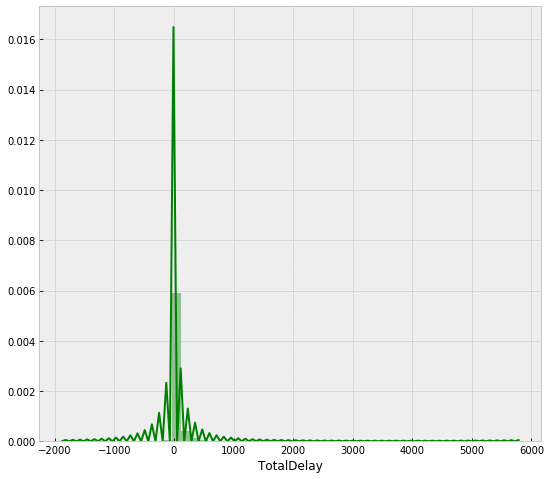

In [18]:
print(df['TotalDelay'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['TotalDelay'], color='g', bins=50, hist_kws={'alpha': 0.4});

In [11]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Month,DayofMonth,DepTime,ArrTime,FlightNum,ActualElapsedTime,Distance,TaxiIn,TaxiOut,TotalDelay
0,1,28,1603,1741,541,158,867,4,23,-20
1,1,29,1559,1736,541,157,867,6,15,-29
2,1,30,1603,1741,541,158,867,9,18,-31
3,1,31,1556,1726,541,150,867,11,10,-42
4,1,2,1934,2235,542,121,867,5,10,37


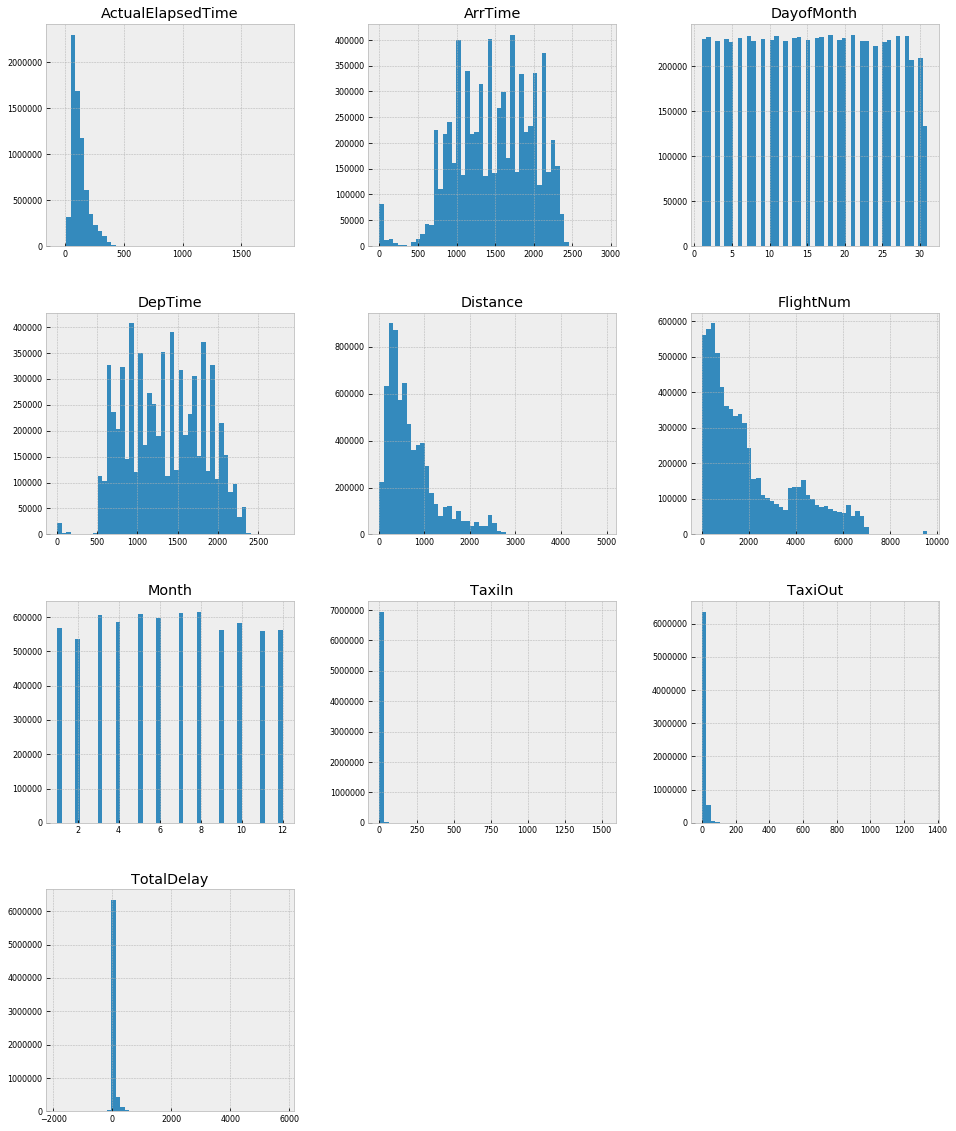

In [13]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [14]:
df_num_corr = df_num.corr()['TotalDelay'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with TotalDelay:\n{}".format(len(golden_features_list), golden_features_list))

There are 2 strongly correlated values with TotalDelay:
TaxiOut    0.252310
DepTime    0.195489
Name: TotalDelay, dtype: float64


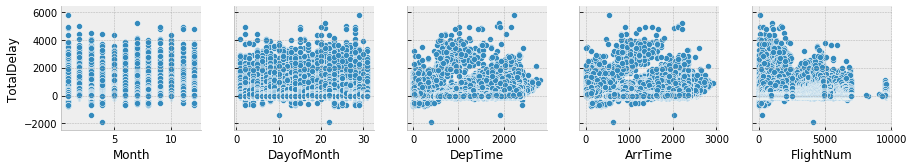

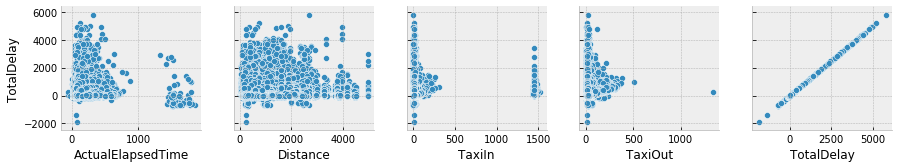

In [15]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['TotalDelay'])